CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

Steps and tasks:  

A. Read the .h5 file and assign to a variable.  

In [31]:
import h5py
hf = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

B. Print all the keys from the .h5 file. 

In [32]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

C. Split the data into X_train, X_test, Y_train, Y_test 

In [33]:
X_train=hf['X_train']
y_train=hf['y_train']
X_test=hf['X_test']
y_test=hf['y_test']

print(X_train)
print(y_train)
print(X_test)
print(y_test)

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
<HDF5 dataset "y_train": shape (42000,), type "|u1">
<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
<HDF5 dataset "y_test": shape (18000,), type "|u1">


2. Data Visualisation and preprocessing  

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.  

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


B. Visualise first 10 images in train data and print its corresponding labels.  

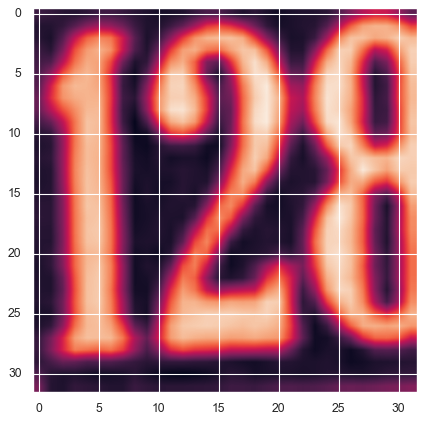

Label:  2


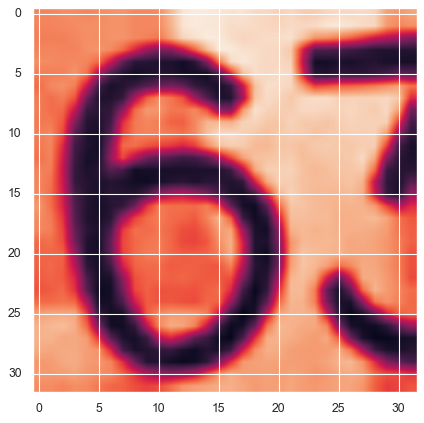

Label:  6


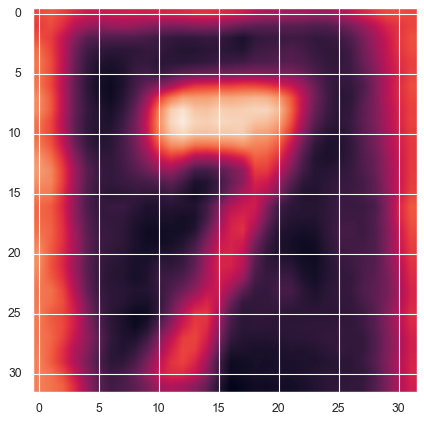

Label:  7


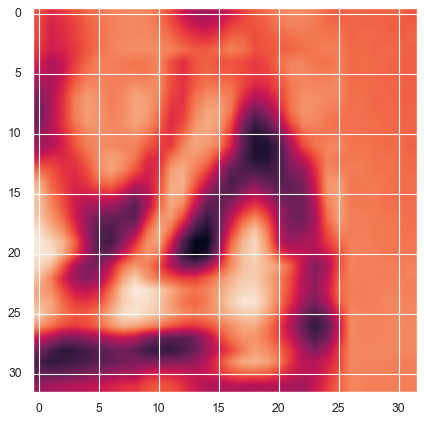

Label:  4


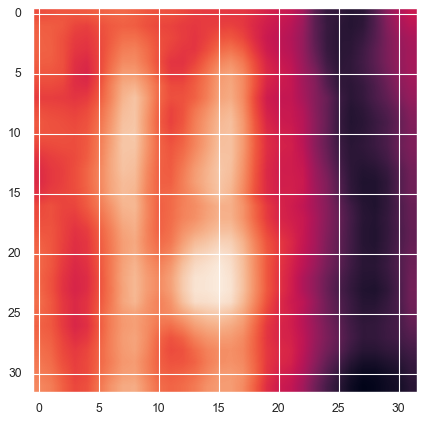

Label:  4


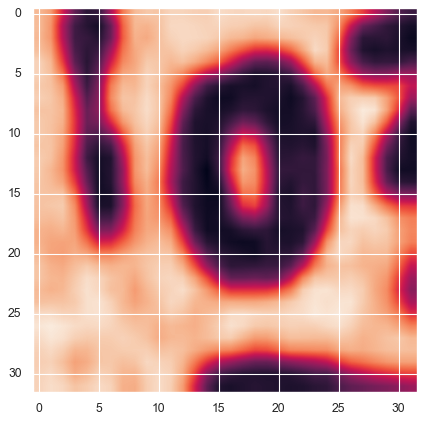

Label:  0


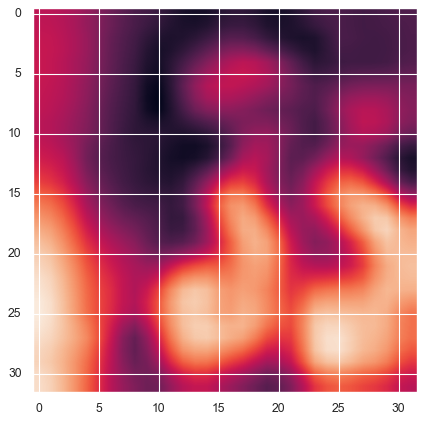

Label:  3


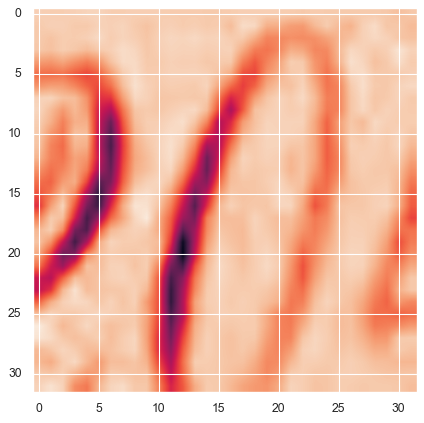

Label:  0


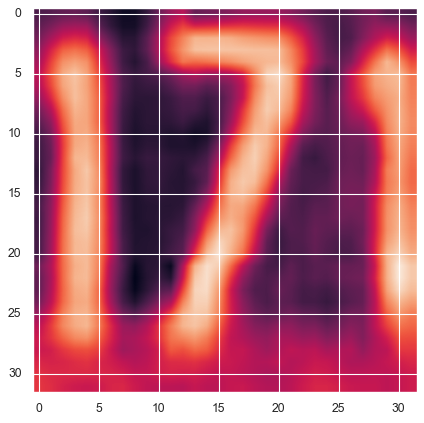

Label:  7


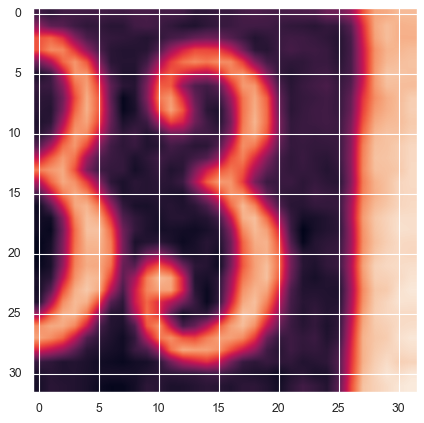

Label:  3


In [35]:
import matplotlib.pyplot as plt

for index in range(0,10):
    plt.imshow(X_train[index])  
    plt.show()
    print('Label: ', y_train[index])

C. Reshape all the images with appropriate shape update the data in same variable.  

In [36]:
X_train= X_train.value.reshape((X_train.shape[0], -1)) 
X_test= X_test.value.reshape((X_test.shape[0], -1)) 

<ipython-input-36-14ee843badf4>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_train= X_train.value.reshape((X_train.shape[0], -1))
<ipython-input-36-14ee843badf4>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_test= X_test.value.reshape((X_test.shape[0], -1))


In [37]:
print('X_train shape:',X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)


D. Normalise the images i.e. Normalise the pixel values. 

E. Transform Labels into format acceptable by Neural Network  

In [38]:
from tensorflow.keras.utils import to_categorical

# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

y_train shape: (42000, 10)
y_test shape: (18000, 10)


F. Print total Number of classes in the Dataset.  

In [39]:
print('There are 10 classes')

There are 10 classes


3. Model Training & Evaluation using Neural Network  

A. Design a Neural Network to train a classifier.  

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.01)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

B. Train the classifier using previously designed Architecture (Use best suitable parameters). 

In [41]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),  batch_size = 100, epochs = 100, verbose = 1)

Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3331 - accuracy: 0.1017 - val_loss: 2.3022 - val_accuracy: 0.0989
Epoch 2/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1047 - val_loss: 2.3015 - val_accuracy: 0.1080
Epoch 3/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3018 - accuracy: 0.1057 - val_loss: 2.3013 - val_accuracy: 0.1095
Epoch 4/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1070 - val_loss: 2.3009 - val_accuracy: 0.1133
Epoch 5/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3008 - accuracy: 0.1117 - val_loss: 2.3001 - val_accuracy: 0.1072
Epoch 6/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3000 - accuracy: 0.1155 - val_loss: 2.2994 - val_accuracy: 0.1162
Epoch 7/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2996 - accuracy: 0.1159 - val_loss: 2.2987 - val_accuracy: 0.1334

Epoch 58/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2660 - accuracy: 0.1304 - val_loss: 2.2599 - val_accuracy: 0.1377
Epoch 59/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2610 - accuracy: 0.1318 - val_loss: 2.2505 - val_accuracy: 0.1455
Epoch 60/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2644 - accuracy: 0.1356 - val_loss: 2.2686 - val_accuracy: 0.1341
Epoch 61/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2711 - accuracy: 0.1437 - val_loss: 2.2859 - val_accuracy: 0.1188
Epoch 62/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2763 - accuracy: 0.1319 - val_loss: 2.2857 - val_accuracy: 0.1248
Epoch 63/100
420/420 [==============================] - 1s 2ms/step - loss: 2.2758 - accuracy: 0.1330 - val_loss: 2.2924 - val_accuracy: 0.1273
Epoch 64/100
420/420 [==============================] - 1s 2ms/step - loss: 2.3051 - accuracy: 0.1102 - val_loss: 2.3058 - val_accuracy:

C. Evaluate performance of the model with appropriate metrics.  

In [42]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)
print(results)  

563/563 [==============================] - 1s 1ms/step - loss: 2.3052 - accuracy: 0.0983
['loss', 'accuracy']
[2.3052103519439697, 0.09827777743339539]


In [43]:
print('Trying new architecture')

Trying new architecture


In [44]:
model = Sequential()

model.add(Dense(100, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = 0.001)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0282 - accuracy: 0.2727 - val_loss: 1.6213 - val_accuracy: 0.4404
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5170 - accuracy: 0.4892 - val_loss: 1.5332 - val_accuracy: 0.4717
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.3493 - accuracy: 0.5596 - val_loss: 1.3149 - val_accuracy: 0.5601
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2428 - accuracy: 0.6037 - val_loss: 1.1937 - val_accuracy: 0.6104
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1725 - accuracy: 0.6279 - val_loss: 1.2623 - val_accuracy: 0.5928
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1318 - accuracy: 0.6404 - val_loss: 1.0668 - val_accuracy: 0.6674
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.0937 - accuracy: 0.6556 - val_loss: 1.0090 - val_ac

In [46]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)
print(results)  

563/563 [==============================] - 0s 845us/step - loss: 0.6382 - accuracy: 0.7992
['loss', 'accuracy']
[0.6382408738136292, 0.7992222309112549]


D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same.

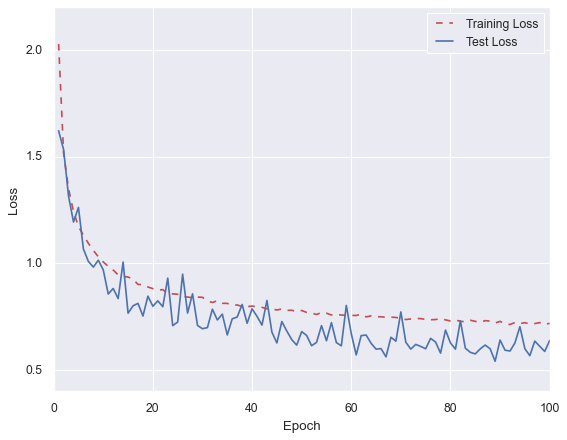

In [47]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

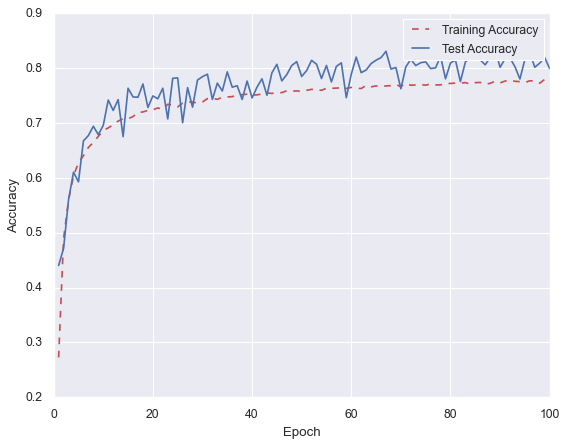

In [48]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

epoch_count = range(1, len(training_acc) + 1)

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [49]:
print('Adding more dense, batch normalization and dropout increased accuracy')

Adding more dense, batch normalization and dropout increased accuracy
